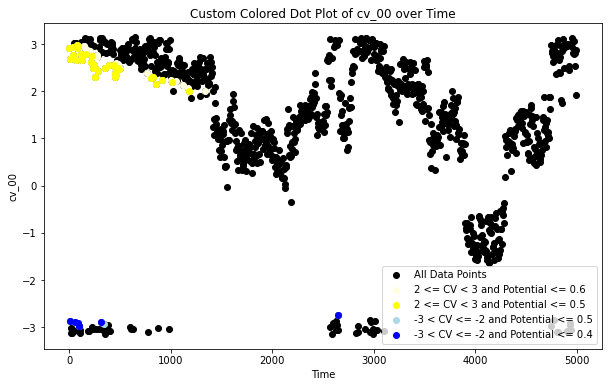

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def load_data(file_path):
    data = {'time': [], 'cv_00': [], 'potential': []}
    
    with open(file_path, 'r') as file:
        for line in file:
            time_match = re.search(r'\[time \[([\d\.]+)\]\]', line)
            cv_00_match = re.search(r'\[cv_00 \[([\d\.-]+)\]\]', line)
            potential_match = re.search(r'\[potential \[([\d\.]+)\]\]', line)
            
            if time_match and cv_00_match and potential_match:
                data['time'].append(float(time_match.group(1)))
                data['cv_00'].append(float(cv_00_match.group(1)))
                data['potential'].append(float(potential_match.group(1)))
    return pd.DataFrame(data)


def plot_custom_colored_data(df):
    plt.figure(figsize=(10, 6))
    
    plt.scatter(df['time'], df['cv_00'], color='black', label='All Data Points')
    yellow_light_condition = (df['cv_00'] >= 2) & (df['cv_00'] < 3) & (df['potential'] <= 0.7)
    plt.scatter(df['time'][yellow_light_condition], df['cv_00'][yellow_light_condition], 
                color='lightyellow', label='2 <= CV < 3 and Potential <= 0.6')
    yellow_strong_condition = (df['cv_00'] >= 2) & (df['cv_00'] < 3) & (df['potential'] <= 0.5)
    plt.scatter(df['time'][yellow_strong_condition], df['cv_00'][yellow_strong_condition], 
                color='yellow', label='2 <= CV < 3 and Potential <= 0.5')
    blue_light_condition = (df['cv_00'] <= -2) & (df['cv_00'] > -3) & (df['potential'] <= 0.5)
    plt.scatter(df['time'][blue_light_condition], df['cv_00'][blue_light_condition], 
                color='lightblue', label='-3 < CV <= -2 and Potential <= 0.5')
    blue_strong_condition = (df['cv_00'] <= -2) & (df['cv_00'] > -3) & (df['potential'] <= 0.4)
    plt.scatter(df['time'][blue_strong_condition], df['cv_00'][blue_strong_condition], 
                color='blue', label='-3 < CV <= -2 and Potential <= 0.4')
    
    plt.xlabel('Time')
    plt.ylabel('cv_00')
    plt.title('Custom Colored Dot Plot of cv_00 over Time')
    plt.legend()
    plt.show()

    
    
file_path = 'desmond_metadynamics_job_4.cvseq'
df = load_data(file_path)
plot_custom_colored_data(df)